In [2]:
# Importation des librairies
import pandas as pd                                                         # Pour la manipulation des données
import numpy as np                                                          # Pour les calculs
import seaborn as sns                                                       # Pour les graphiques
import matplotlib.pyplot as plt                                      
from sklearn.model_selection import train_test_split                        # Pour séparer le jeu de données en jeu d'entraînement et jeu de test
from sklearn.ensemble import RandomForestClassifier                         # Pour le modèle de classification
from sklearn.preprocessing import StandardScaler                            # Pour la standardisation des données
from sklearn.model_selection import GridSearchCV, cross_validate            # Pour la validation croisée
from sklearn.model_selection import cross_val_score, StratifiedKFold        # Pour la validation croisée
from sklearn.model_selection import RandomizedSearchCV, RandomizedSearchCV  # Pour la validation croisée
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve           # Pour le scoring
from sklearn.metrics import classification_report, confusion_matrix         
from sklearn.metrics import precision_score, recall_score, f1_score         
from sklearn.metrics import make_scorer, matthews_corrcoef                 
from tqdm.notebook import tqdm                                              # Pour la barre de chargement
from time import time                                                       # Pour calculer le temps d'exécution
from itertools import product                                               # Pour faire des boucles sur plusieurs paramètres   
from imblearn.under_sampling import RandomUnderSampler                      # Pour le sous-échantillonnage
from imblearn.over_sampling import RandomOverSampler                        # Pour le sur-échantillonnage
import pickle                                                               # Pour sauvegarder le modèle
from sklearn.model_selection import cross_val_predict                       # Pour la validation croisée
import ast                                                                  # Pour convertir une chaîne de caractères en liste

pd.options.display.max_columns = 60
pd.options.display.max_rows = 150
pd.set_option('display.max_colwidth', None)

1. [**Import Dataset verification de la repartition des classes**](#1.-Import-Dataset-verification-de-la-repartition-des-classes)
2. [**Séparation du dataset en test/train**](#2.-Separation-du-dataset-en-test/train)
3. [**Test de différentes méthodes d'échantillonnage**](#3.-Test-de-differentes-methodes-d'echantillonnage)
    1.  [Fonctions](#3.1-Fonctions)
    2.  [Sauvegarde/Import des resultats](#3.2-Sauvegarde/Import-des-resultats)
    3.  [Resultats](#3.3-Resultats)
    4.  [Testing sensebilité de la metrique](#3.4-Testing-sensebilite-de-la-metrique)
4. [**Recherche d'Hyperparametres avec RandomGridSearchCV**](#4.-Recherche-d'Hyperparametres-avec-RandomGridSearchCV)
    1.  [Sauvegarde/recharge des resultats du gridsearchCV](#4.1-Sauvegarde/recharge-des-resultats-du-model)
    2.  [Affichage et analyse de resultats](#4.2-Affichage-de-resultats)
5. [**Resultats du model sur le donnees de test**](#5.-Resultats-du-model-sur-le-donnees-de-test)
    1.  [Entraînement du modèle](#5.1-Entrainement-du-modele)  
    2.  [Sauvegarde/Recharge du modele](#5.2-Sauvegarde/Recharge-du-modele)   
    3.  [Prédiction sur le dataset de test](#5.3-Prediction-sur-le-dataset-de-train/test)


### 1. Import Dataset verification de la repartition des classes

In [13]:
# Import dataset 
df = pd.read_csv('data/dataset_18-21_for_model_encoding.csv',sep=',', index_col=0)
df.head()

,grav,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,...,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,3.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
201800000001,1.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
201800000002,1.0,-1.083406,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201800000003,3.0,-1.083406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800000004,1.0,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [3]:
# Distribution des classes
df_c = df.copy()
print(round(df_c['grav'].value_counts(normalize= True)*100,1).map(lambda x: f"{x}%"))

print('\n')

Repartition = pd.crosstab(df_c['grav'], df_c['grav'], normalize='all').round(3)*100
Repartition = Repartition.rename(index={1: 'Indemne', 2: 'Tue', 3: 'Blessé', 4: 'Blesse leger'}, columns={1: '1', 2: '2', 3: '3', 4: '4'}). \
                                                rename_axis('', axis='rows').rename_axis('', axis='columns')

print("\033[1mRepartition de la variable cible par default en [%]\033[0m\n")
print(Repartition)

1.0    42.5%
4.0    39.2%
3.0    15.8%
2.0     2.6%
Name: grav, dtype: object


Repartition de la variable cible par default en [%]

                 1    2     3     4
                                   
Indemne       42.5  0.0   0.0   0.0
Tue            0.0  2.6   0.0   0.0
Blessé         0.0  0.0  15.8   0.0
Blesse leger   0.0  0.0   0.0  39.2


### 2. Separation du dataset en test/train

In [4]:
X = df_c.drop('grav', axis=1)  
y = df_c['grav']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y  ,random_state=42)

# Verification de la répartition des classes dans les jeux de données
df_train = y_train.value_counts(normalize=True) * 100
print("Répartition des classes dans l'ensemble d'entraînement:")
print(round(df_train, 1).sort_index())

df_test =y_test.value_counts(normalize=True) * 100
print("\nRépartition des classes dans l'ensemble de test:")
print(round(df_test, 1).sort_index())

Répartition des classes dans l'ensemble d'entraînement:
1.0    42.5
2.0     2.6
3.0    15.8
4.0    39.2
Name: grav, dtype: float64

Répartition des classes dans l'ensemble de test:
1.0    42.5
2.0     2.6
3.0    15.8
4.0    39.2
Name: grav, dtype: float64


### 3. Test de differentes methodes d'echantillonnage

#### 3.1 Fonctions

In [5]:

# Fonctions pour tester les méthodes d'équilibrage de classes
def metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5

def compare_methods_inbalanced_ds(X_train, X_test, y_train, y_test):
    cv = 5  
    param_grid = {'max_depth': 10}
    rf_cv = RandomForestClassifier(random_state=42, n_jobs=-1, **param_grid)
    cv_scoring = {
        'MCC': make_scorer(matthews_corrcoef),
        'f1 Weighted': make_scorer(f1_score, average='weighted'),
        'f1': make_scorer(f1_score, average='macro'),
        'My Metric': make_scorer(metric)
    }

    ###
    # Méthode 0 : Utilisation de Random Forest sans équilibrer les classes
    cv_0 = cross_validate(rf_cv, X_train, y_train, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)
    score_0_mcc = cv_0['test_MCC'].mean()
    score_0_f1 = cv_0['test_f1'].mean()
    score_0_f1W = cv_0['test_f1 Weighted'].mean()
    score_0_metric = cv_0['test_My Metric'].mean()
    # Prédiction sur le jeu de test
    rf_cv.fit(X_train, y_train)
    predictions_0 = rf_cv.predict(X_test)
    f1_score_0_test = f1_score(y_test, predictions_0, average='macro')
    f1W_score_0_test = f1_score(y_test, predictions_0, average='weighted')
    mcc_score_0_test = matthews_corrcoef(y_test, predictions_0)
    metric_0_test = metric(y_test, predictions_0)
    report_0 = classification_report(y_test, predictions_0)
###
    # Méthode 1 : Utilisation balanced_subsample pour équilibrer les classes
    rf_balanced_subsample = RandomForestClassifier(class_weight='balanced_subsample', random_state=42, n_jobs=-1,**param_grid)
    cv_1 = cross_validate(rf_balanced_subsample, X_train, y_train, cv=cv, scoring=cv_scoring, return_train_score=True)
    score_1_mcc = cv_1['test_MCC'].mean()
    score_1_f1 = cv_1['test_f1'].mean()
    score_1_f1W = cv_1['test_f1 Weighted'].mean()
    score_1_metric = cv_1['test_My Metric'].mean()
    # Prédiction sur le jeu de test
    rf_balanced_subsample.fit(X_train, y_train)
    predictions_1 = rf_balanced_subsample.predict(X_test)
    f1_score_1_test = f1_score(y_test, predictions_1, average='macro')
    f1W_score_1_test = f1_score(y_test, predictions_1, average='weighted')
    mcc_score_1_test = matthews_corrcoef(y_test, predictions_1)
    metric_1_test = metric(y_test, predictions_1)
    report_1 = classification_report(y_test, predictions_1)
    
###
    # Méthode 2 : Utilisation de RandomOverSampler pour suréchantillonner les classes minoritaires
    ros = RandomOverSampler(random_state=42)
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
    cv_2 = cross_validate(rf_cv, X_train_ros, y_train_ros, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)
    score_2_mcc = cv_2['test_MCC'].mean()
    score_2_f1 = cv_2['test_f1'].mean()
    score_2_f1W = cv_2['test_f1 Weighted'].mean()
    score_2_metric = cv_2['test_My Metric'].mean()
    # Prédiction sur le jeu de test
    rf_cv.fit(X_train_ros, y_train_ros)
    predictions_2 = rf_cv.predict(X_test)
    f1_score_2_test = f1_score(y_test, predictions_2,average='macro')
    f1W_score_2_test = f1_score(y_test, predictions_2, average='weighted')
    mcc_score_2_test = matthews_corrcoef(y_test, predictions_2)
    metric_2_test = metric(y_test, predictions_2)
    report_2 = classification_report(y_test, predictions_2)
    
###
    # Méthode 3 : Utilisation de RandomUnderSampler pour sous-échantillonner les classes majoritaires
    rus = RandomUnderSampler(random_state=42)
    X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
    cv_3 = cross_validate(rf_cv, X_train_rus, y_train_rus, cv=cv, scoring=cv_scoring, return_train_score=True, n_jobs=-1)
    score_3_mcc = cv_3['test_MCC'].mean()
    score_3_f1 = cv_3['test_f1'].mean()
    score_3_f1W = cv_3['test_f1 Weighted'].mean()
    score_3_metric = cv_3['test_My Metric'].mean()
    # Prédiction sur le jeu de test
    rf_cv.fit(X_train_rus, y_train_rus)
    predictions_3 = rf_cv.predict(X_test)
    f1_score_3_test = f1_score(y_test, predictions_3, average='macro')
    f1W_score_3_test = f1_score(y_test, predictions_3, average='weighted')
    mcc_score_3_test = matthews_corrcoef(y_test, predictions_3)
    metric_3_test = metric(y_test, predictions_3)
    report_3 = classification_report(y_test, predictions_3)
###
    # Méthode 4 : Utilisation de Random Forest avec StratifiedKFold sans équilibrer les classes
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    cv_4 = cross_validate(rf_cv, X_train, y_train, cv=skf, scoring=cv_scoring, return_train_score=True, n_jobs=-1)
    score_4_mcc = cv_4['test_MCC'].mean()
    score_4_f1 = cv_4['test_f1'].mean()
    score_4_f1W = cv_4['test_f1 Weighted'].mean()
    score_4_metric = cv_4['test_My Metric'].mean()
###   
    # Méthode 5 : Utilisation balanced_subsample pour équilibrer les classes
    rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1,**param_grid)
    cv_5 = cross_validate(rf_balanced, X_train, y_train, cv=cv, scoring=cv_scoring, return_train_score=True)
    score_5_mcc = cv_5['test_MCC'].mean()
    score_5_f1 = cv_5['test_f1'].mean()
    score_5_f1W = cv_5['test_f1 Weighted'].mean()
    score_5_metric = cv_5['test_My Metric'].mean()
    # Prédiction sur le jeu de test
    rf_balanced.fit(X_train, y_train)
    predictions_5 = rf_balanced.predict(X_test)
    f1_score_5_test = f1_score(y_test, predictions_5, average='macro')
    f1W_score_5_test = f1_score(y_test, predictions_5, average='weighted')
    mcc_score_5_test = matthews_corrcoef(y_test, predictions_5)
    metric_5_test = metric(y_test, predictions_5)
    report_5 = classification_report(y_test, predictions_5)    
    
 # Creation de dataframe avec les results    
 
    results_list = [
        {'Method': 'Meth_0', 'Nom': 'Sans équilibrage',
        'MCC Train Score': score_0_mcc, 'MCC Test Score': mcc_score_0_test,
        'F1 Weighted Train Score': score_0_f1W, 'F1 Weighted Test Score': f1W_score_0_test,
        'F1 Train Score': score_0_f1, 'F1 Test Score': f1_score_0_test,
        'Metric_train': score_0_metric, 'Metric_test': metric_0_test},
        
        {'Method': 'Meth_1', 'Nom': 'Balanced Subsample',
        'MCC Train Score': score_1_mcc, 'MCC Test Score': mcc_score_1_test,
        'F1 Weighted Train Score': score_1_f1W, 'F1 Weighted Test Score': f1W_score_1_test,
        'F1 Train Score': score_1_f1, 'F1 Test Score': f1_score_1_test,
        'Metric_train': score_1_metric, 'Metric_test': metric_1_test},
        
        {'Method': 'Meth_2', 'Nom': 'Random OverSampling',
        'MCC Train Score': score_2_mcc, 'MCC Test Score': mcc_score_2_test,
        'F1 Weighted Train Score': score_2_f1W, 'F1 Weighted Test Score': f1W_score_2_test,
        'F1 Train Score': score_2_f1, 'F1 Test Score': f1_score_2_test,
        'Metric_train': score_2_metric, 'Metric_test': metric_2_test},
        
        {'Method': 'Meth_3', 'Nom': 'Random UnderSampling',
        'MCC Train Score': score_3_mcc, 'MCC Test Score': mcc_score_3_test,
        'F1 Weighted Train Score': score_3_f1W, 'F1 Weighted Test Score': f1W_score_3_test,
        'F1 Train Score': score_3_f1, 'F1 Test Score': f1_score_3_test,
        'Metric_train': score_3_metric, 'Metric_test': metric_3_test},
        
        {'Method': 'Meth_4', 'Nom': 'Stratified K-Fold',
        'MCC Train Score': score_4_mcc, 'MCC Test Score': None,
        'F1 Weighted Train Score': score_4_f1W, 'F1 Weighted Test Score': None,
        'F1 Train Score': score_4_f1, 'F1 Test Score': None,
        'Metric_train': score_4_metric, 'Metric_test': None},
        
        {'Method': 'Meth_5', 'Nom': 'Balanced',
        'MCC Train Score': score_5_mcc, 'MCC Test Score': mcc_score_5_test,
        'F1 Weighted Train Score': score_5_f1W, 'F1 Weighted Test Score': f1W_score_5_test,
        'F1 Train Score': score_5_f1, 'F1 Test Score': f1_score_5_test,
        'Metric_train': score_5_metric, 'Metric_test': metric_5_test}
                ]



    results_methods_inbalanced = pd.DataFrame(results_list)

    return (results_methods_inbalanced,
            report_0, report_1, report_2, report_3, report_5)



In [6]:
#Exucutions des fonctions (~20 min)

#(results_methods_inbalanced,report_0, report_1, report_2, report_3, report_5) = compare_methods_inbalanced_ds(X_train, X_test, y_train, y_test)

#### 3.2 Sauvegarde/Import des resultats

In [6]:
# Sauvegarder les objets
'''
with open('Save_RandomForest/multi/mult_comp_inbalanced_cv5_p15.pkl', 'wb') as f:
    pickle.dump((results_methods_inbalanced, report_0, report_1, report_2, report_3, report_5), f)
'''

# Importer les objets
#'''
with open('Save_RandomForest/multi/mult_comp_inbalanced_cv5_p15.pkl', 'rb') as f:
    loaded_results, loaded_report_0, loaded_report_1, loaded_report_2, loaded_report_3, loaded_report_5 = pickle.load(f)
#'''

#### 3.3 Resultats

In [11]:
#results_methods_inbalanced
loaded_results
#print(loaded_report_3)

,Method,Nom,MCC Train Score,MCC Test Score,F1 Weighted Train Score,F1 Weighted Test Score,F1 Train Score,F1 Test Score,Metric_train,Metric_test
0,Meth_0,Sans équilibrage,0.399176,0.400032,0.591649,0.592305,0.406428,0.406704,0.119533,0.119213
1,Meth_1,Balanced Subsample,0.382414,0.378412,0.567476,0.564053,0.446536,0.445109,0.263676,0.265434
2,Meth_2,Random OverSampling,0.427351,0.379118,0.539490,0.564856,0.539490,0.443516,0.545495,0.259991
3,Meth_3,Random UnderSampling,0.392741,0.372906,0.517251,0.561266,0.517250,0.439456,0.498762,0.255315
4,Meth_4,Stratified K-Fold,0.398586,NaN,0.591177,NaN,0.405470,NaN,0.117771,NaN
5,Meth_5,Balanced,0.381530,0.380063,0.567363,0.568303,0.446183,0.446074,0.117771,0.260937


#### 3.4 Testing sensebilite de la metrique

In [15]:
# Comparaison des résultats des méthodes d'équilibrage de classes. L'objectif est de sélectionner deux méthodes et d'examiner la variation de chaque métrique.
# Cela permet de tester la sensibilité de chaque métrique.

# Création d'un dictionnaire avec les résultats des méthodes Meth1 et Meth3
data = {
    'Method': ['Meth1', 'Meth3'],
    'Metric_test': [loaded_results.loc[1, 'Metric_test'], loaded_results.loc[3, 'Metric_test']],
    'F1 Test Score': [loaded_results.loc[1, 'F1 Test Score'], loaded_results.loc[3, 'F1 Test Score']],
    'F1 Weighted Test Score': [loaded_results.loc[1, 'F1 Weighted Test Score'], loaded_results.loc[3, 'F1 Weighted Test Score']],
    'MCC Test Score': [loaded_results.loc[1, 'MCC Test Score'], loaded_results.loc[3, 'MCC Test Score']]
}

results_change = pd.DataFrame(data)

# Calcul du pourcentage de changement entre Meth1/Meth3 pour chaque métrique

results_change['Metric_change (%)'] = round((
    (results_change['Metric_test'][0] - results_change['Metric_test'][1])
    / results_change['Metric_test'][0] * 100
),1)
results_change['F1_change (%)'] = round((
    (results_change['F1 Test Score'][0] - results_change['F1 Test Score'][1])
    / results_change['F1 Test Score'][0] * 100
),1)
results_change['F1_Weighted_change (%)'] = round((
    (results_change['F1 Weighted Test Score'][0] - results_change['F1 Weighted Test Score'][1])
    / results_change['F1 Weighted Test Score'][0] * 100
),1)
results_change['MCC_change (%)'] = round((
    (results_change['MCC Test Score'][0] - results_change['MCC Test Score'][1])
    / results_change['MCC Test Score'][0] * 100
),1)

# Suppression des colonnes de résultats pour ne garder que les colonnes nescessaires
results_change = results_change.drop(columns=['Metric_test', 'F1 Test Score', 'F1 Weighted Test Score','MCC Test Score'])

print(loaded_report_1)
print(loaded_report_3)

results_change

              precision    recall  f1-score   support

         1.0       0.67      0.87      0.76     35927
         2.0       0.12      0.61      0.20      2193
         3.0       0.40      0.33      0.36     13334
         4.0       0.73      0.34      0.46     33174

    accuracy                           0.57     84628
   macro avg       0.48      0.54      0.45     84628
weighted avg       0.63      0.57      0.56     84628

              precision    recall  f1-score   support

         1.0       0.68      0.86      0.76     35927
         2.0       0.11      0.65      0.19      2193
         3.0       0.38      0.32      0.35     13334
         4.0       0.72      0.34      0.46     33174

    accuracy                           0.56     84628
   macro avg       0.47      0.54      0.44     84628
weighted avg       0.63      0.56      0.56     84628



,Method,Metric_change (%),F1_change (%),F1_Weighted_change (%),MCC_change (%)
0,Meth1,3.8,1.3,0.5,1.5
1,Meth3,3.8,1.3,0.5,1.5


In [ ]:
#OLD testing
'''
(results_methods_inbalanced['Metric_test'][1]-results_methods_inbalanced['Metric_test'][3])/results_methods_inbalanced['Metric_test'][1]*100
(results_methods_inbalanced['F1 Test Score'][1]-results_methods_inbalanced['F1 Test Score'][3])/results_methods_inbalanced['F1 Test Score'][1]*100
(results_methods_inbalanced['F1 Weighted Test Score'][1]-results_methods_inbalanced['F1 Weighted Test Score'][3])/results_methods_inbalanced['F1 Weighted Test Score'][1]*100
print("Index de valeur max de MCC --- ",loaded_results['MCC Test Score'].idxmax())
print("Index de valeur max de F1 Weighted --- ",loaded_results['F1 Weighted Test Score'].idxmax())
print("Index de valeur max de F1 --- ",loaded_results['F1 Test Score'].idxmax())
print("Index de valeur max de Metric_test --- ",loaded_results['Metric_test'].idxmax())
print("Index de valeur max de Metric_test --- ",loaded_results['Metric_test'].idxmin())
'''

### 4. Recherche d'Hyperparametres avec RandomGridSearchCV

In [16]:
param_grid_all = {
    'n_estimators': [100, 300, 500],                    # Nombre d'arbres dans la forêt
    'criterion': ['gini', 'entropy'],                   # Fonction de mesure de qualité de la partition
    'max_depth': [None, 5, 10, 20],                     # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],                    # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4],                      # Nombre minimum d'échantillons requis pour être une feuille
    'max_features': ['auto', 'sqrt', 'log2', None],     # Nombre de fonctionnalités à considérer lors de la recherche de la meilleure partition
    'bootstrap': [True, False],                         # Si les échantillons doivent être tirés avec remplacement
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Poids des classes pour l'équilibrage
    'max_samples': [None, 0.5, 0.8],                    # Nombre d'échantillons à tirer lors de l'apprentissage pour chaque arbre
    'max_leaf_nodes': [None, 5, 10, 20],                # Nombre maximum de feuilles
    'ccp_alpha': [0.0, 0.1, 0.2],                       # Paramètre de complexité de l'élagage minimal
    'random_state': [42],                               # Graine aléatoire pour la reproductibilité
    'n_jobs': [-1],                                     # Nombre de tâches à exécuter en parallèle (-1 signifie utiliser tous les cœurs disponibles)
    'oob_score': [True, False]                          # Utiliser les échantillons out-of-bag pour estimer l'erreur de généralisation
}


# Nombre total d'itérations pour la RF des hyperparamètres
total_iterations = 1250

# Définition d'une métrique personnalisée 
def my_metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5


# Définition des métriques de scoring pour RandomizedSearchCV
scoring = {
    'MCC': make_scorer(matthews_corrcoef),
    'F1': make_scorer(f1_score, average='macro'),
    'Cust_metric': make_scorer(my_metric),
    'F1_cl_2': make_scorer(f1_score, labels=[2], average=None)
}


# Définition de l'espace des hyperparamètres à rechercher
param_dist = {
    'n_estimators': [100, 300, 600, 1000, 2000],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split':  [2, 5, 10],
    'min_samples_leaf': [1, 4, 20],
    'class_weight': ['balanced_subsample'],
    'bootstrap': [True],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01],
    'min_impurity_decrease': [0.0, 0.03],
    'max_leaf_nodes': [None, 5, 10],
    'min_weight_fraction_leaf': [0.0, 0.03],
    
}     
# Initialisation du classificateur 
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Créer le RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist, 
    scoring=scoring,
    n_iter=total_iterations,       # Nombre d'itérations de la recherche aléatoire
    cv=3,   
    n_jobs=-1,  
    random_state=42,
    refit=False, 
    verbose=2
)

random_search.fit(X_train, y_train)

# stocker les résultats de RandomizedSearchCV
results_df = pd.DataFrame(random_search.cv_results_)

# Sélectionner les colonnes pertinentes
selected_columns = ['params'] + [f'mean_test_{metric}' for metric in scoring]
results_df = results_df[selected_columns]

#results_df

Fitting 3 folds for each of 1250 candidates, totalling 3750 fits
[CV] END bootstrap=True, ccp_alpha=0.0, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_impurity_decrease=0.03, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.03, n_estimators=100; total time=  36.3s
[CV] END bootstrap=True, ccp_alpha=0.0, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_impurity_decrease=0.03, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.03, n_estimators=100; total time=  36.4s
[CV] END bootstrap=True, ccp_alpha=0.0, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, max_leaf_nodes=5, min_impurity_decrease=0.03, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.03, n_estimators=100; total time=  39.6s
[CV] END bootstrap=True, ccp_alpha=0.01, class_weight=balanced_subsample, criterion=entropy, max_depth=3, m

#### 4.1 Sauvegarde/recharge des resultats du model

In [7]:
# Sauvegarder les résultats
#results_df.to_csv('results_RF_mult_250combin.csv', index=False)
#-------------------------
# Importer les résultats
results_df = pd.read_csv('Save_RandomForest/multi/results_RF_mult_1250combin_cut.csv')


#### 4.2 Affichage de resultats

In [8]:
# Affichage des résultats de gridsearch_cv
#results_df['mean_test_Cust_metric'].sort_values(ascending=False).head(10)
#results_df.sort_values(by='mean_test_MCC', ascending=False).head(10)
results_df.sort_values(by='mean_test_F1', ascending=False).head(3)

,params,mean_test_MCC,mean_test_F1,mean_test_Cust_metric,mean_test_F1_cl_2
703,"{'n_estimators': 1000, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}",0.443219,0.514583,0.334033,0.252169
572,"{'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}",0.439890,0.512174,0.331727,0.249754
147,"{'n_estimators': 1000, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True}",0.434466,0.508973,0.333095,0.259810


In [21]:
# Afficchage des résultats de gridsearch_cv. On recherche les hyperparamètres qui maximisent chaque métrique 
print("Index de valeur max de MCC --- ",results_df['mean_test_MCC'].idxmax())
print("Index de valeur max de f1 --- ",results_df['mean_test_F1'].idxmax())
print("Index de valeur max de Cust_metric --- ",results_df['mean_test_Cust_metric'].idxmax())
print("Index de valeur max de f1_cl2 --- ",results_df['mean_test_F1_cl_2'].idxmax())

Index de valeur max de MCC ---  703
Index de valeur max de f1 ---  703
Index de valeur max de Cust_metric ---  703
Index de valeur max de f1_cl2 ---  147


In [10]:
results_df['params'] = results_df['params'].apply(ast.literal_eval)

In [11]:
#results_df.iloc[147:150,0:]
results_df['params'][144]
#results_df['params'][703]

{'n_estimators': 100,
 'min_weight_fraction_leaf': 0.03,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.03,
 'max_leaf_nodes': 5,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'ccp_alpha': 0.01,
 'bootstrap': True}

### 5. Resultats du model sur le donnees de test

In [22]:
#Fonctions pour entrainements, predictions et rapports

from sklearn.model_selection import cross_val_predict

def RF_simple(X_train, y_train, param_grid):
    mod_RF_simple = RandomForestClassifier(**param_grid, n_jobs=-1, random_state=42)
    mod_RF_simple.fit(X_train, y_train)
    return mod_RF_simple

def plot_confusion_matrix(y_true, y_pred, title, ax, class_labels):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)

def print_rapports(y_true, y_pred, class_labels):
    fig, axes = plt.subplots(1, 1, figsize=(10, 4))
    
    # Matrice de confusion pour les données
    axes.set_title("Matrice de confusion")
    plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', ax=axes, class_labels=class_labels)

    plt.tight_layout()
    plt.show()

    # Rapport de classification
    print("Rapport de classification :")
    print(classification_report(y_true, y_pred))

#### 5.1 Entrainement du modele

In [27]:
# Convertion des paramètres en dictionnaire
results_df['params'] = results_df['params'].apply(ast.literal_eval)

In [32]:
# Sélection des hyperparamètres qui maximisent la métrique 
param_check = results_df['params'][147]

mod_RF = RF_simple(X_train, y_train, param_check)

# Prédiction sur les données d'entraînement via validation croisée
y_train_pred_cv = cross_val_predict(mod_RF, X_train, y_train, cv=3)

# Entraînement sur l'ensemble d'entraînement et prédiction sur le jeu de test
mod_RF.fit(X_train, y_train)
y_test_pred = mod_RF.predict(X_test)

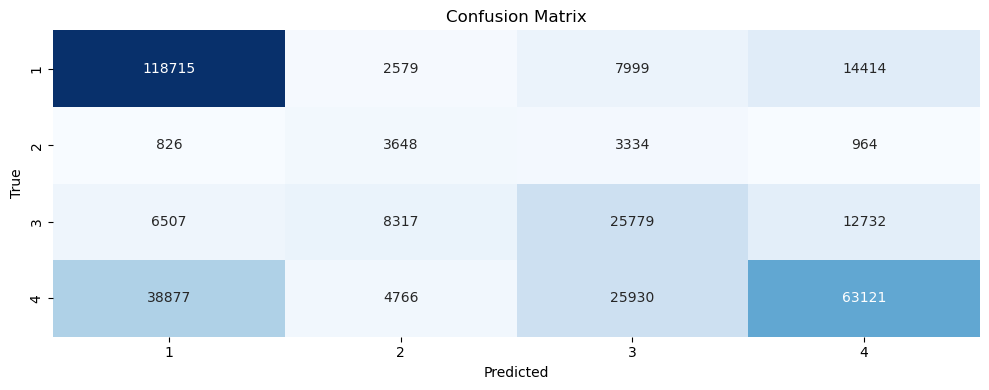

Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.72      0.83      0.77    143707
         2.0       0.19      0.42      0.26      8772
         3.0       0.41      0.48      0.44     53335
         4.0       0.69      0.48      0.56    132694

    accuracy                           0.62    338508
   macro avg       0.50      0.55      0.51    338508
weighted avg       0.65      0.62      0.62    338508



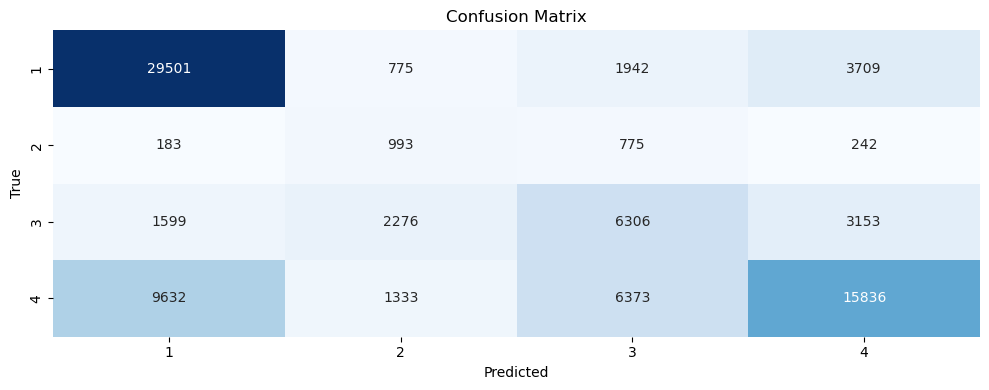

Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.72      0.82      0.77     35927
         2.0       0.18      0.45      0.26      2193
         3.0       0.41      0.47      0.44     13334
         4.0       0.69      0.48      0.56     33174

    accuracy                           0.62     84628
   macro avg       0.50      0.56      0.51     84628
weighted avg       0.65      0.62      0.62     84628



In [33]:
# Affichage des résultats
class_labels = [1, 2, 3, 4]
print_rapports(y_train, y_train_pred_cv, class_labels)
print_rapports(y_test, y_test_pred, class_labels)

#### 5.2 Sauvegarde/Recharge du modele

In [34]:
'''
# Créer un dictionnaire pour stocker le modèle et les prédictions
saved_data = {
    'modele_RF': mod_RF,
    'predictions_train': y_train_pred_cv,
    'predictions_test': y_test_pred
}

# Sauvegarder le dictionnaire dans un fichier pkl
with open('Save_RandomForest/multi/trainModel_RF_mult_1250combin_147.pkl', 'wb') as saved_data_file:
    pickle.dump(saved_data, saved_data_file)
'''

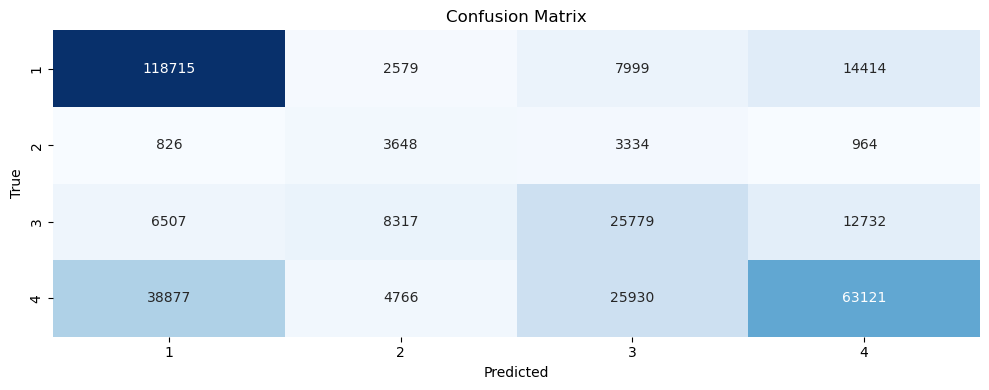

Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.72      0.83      0.77    143707
         2.0       0.19      0.42      0.26      8772
         3.0       0.41      0.48      0.44     53335
         4.0       0.69      0.48      0.56    132694

    accuracy                           0.62    338508
   macro avg       0.50      0.55      0.51    338508
weighted avg       0.65      0.62      0.62    338508



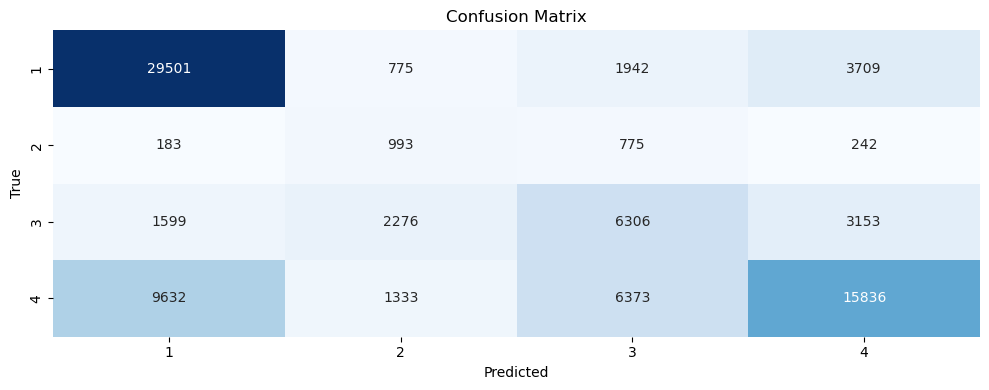

Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.72      0.82      0.77     35927
         2.0       0.18      0.45      0.26      2193
         3.0       0.41      0.47      0.44     13334
         4.0       0.69      0.48      0.56     33174

    accuracy                           0.62     84628
   macro avg       0.50      0.56      0.51     84628
weighted avg       0.65      0.62      0.62     84628



In [35]:
# Charger le dictionnaire depuis le fichier pkl
with open('Save_RandomForest/multi/trainModel_RF_mult_1250combin_147.pkl', 'rb') as saved_data_file:
    loaded_data = pickle.load(saved_data_file)

# Accéder aux éléments du dictionnaire
loaded_modele_RF = loaded_data['modele_RF']
loaded_predictions_train = loaded_data['predictions_train']
loaded_predictions_test = loaded_data['predictions_test']

# Définir la liste des étiquettes de classe
class_labels = [1, 2, 3, 4]

# Appeler les fonctions d'affichage des rapports
print_rapports(y_train, loaded_predictions_train, class_labels)
print_rapports(y_test, loaded_predictions_test, class_labels)

#### 5.3 Prediction sur le dataset de train/test

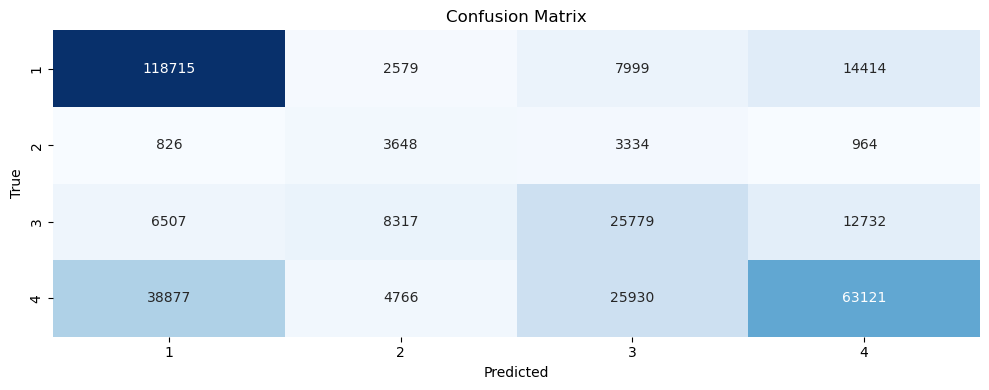

Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.72      0.83      0.77    143707
         2.0       0.19      0.42      0.26      8772
         3.0       0.41      0.48      0.44     53335
         4.0       0.69      0.48      0.56    132694

    accuracy                           0.62    338508
   macro avg       0.50      0.55      0.51    338508
weighted avg       0.65      0.62      0.62    338508



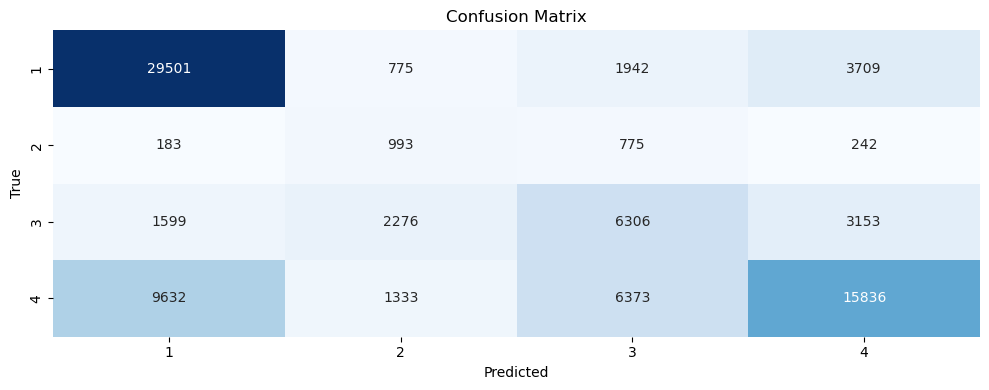

Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.72      0.82      0.77     35927
         2.0       0.18      0.45      0.26      2193
         3.0       0.41      0.47      0.44     13334
         4.0       0.69      0.48      0.56     33174

    accuracy                           0.62     84628
   macro avg       0.50      0.56      0.51     84628
weighted avg       0.65      0.62      0.62     84628



In [36]:
# Définir la liste des étiquettes de classe
class_labels = [1, 2, 3, 4]

# Appeler les fonctions d'affichage des rapports
print_rapports(y_train, loaded_predictions_train, class_labels)
print_rapports(y_test, loaded_predictions_test, class_labels)
